In [77]:
import awkward as ak
from pathlib import Path
import xtrack as xt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# BPM classes

## OLD from 16-06-2025

In [ ]:
from typing import Optional, Tuple, Union, Set, List
import re

class BPMBehavior(ak.Record):
    pass

class BPMCollectionBehavior(ak.Array):
    @property
    def full_index(self):
        if not hasattr(self, '_full_index'):
            self._build_full_index()
        return self._full_index
    
    @property
    def index(self):
        if not hasattr(self, '_index'):
            self._build_index()
        return self._index
    
    @property
    def bpms_hor(self):
        if not hasattr(self, '_bpms_hor'):
            self._build_bpms_hor()
        return self._bpms_hor
    
    @property
    def bpms_ver(self):
        if not hasattr(self, '_bpms_ver'):
            self._build_bpms_ver()
        return self._bpms_ver
    
    @property
    def hor_turn_position(self):
        if not hasattr(self, '_hor_pos'):
            self._build_hor_pos()
        return self._hor_pos
    
    @property
    def ver_turn_position(self):
        if not hasattr(self, '_ver_pos'):
            self._build_ver_pos()
        return self._ver_pos
    
    def _build_full_index(self):
        self._full_index = {}

        bpm_entries = []

        # Collect all BPMs with metadata
        for crate in self.fields:
            for i, bpm in enumerate(self[crate]['value']['channelNames'][0]):
                if bpm != 'SPARE':
                    split_bpm = bpm.split('.')
                    bpm_name = split_bpm[0].lower() + '.' + split_bpm[1]
                    plane = split_bpm[2]
                    position = self[crate]['value']['positions'][0][i]

                    bpm_entries.append({
                        'bpm_name': bpm_name,
                        'plane': plane,
                        'crate': crate,
                        'position': position
                    })

        # Sort BPMs by natural order (e.g., bpm.1, bpm.2, ..., bpm.10)
        def natural_key(entry):
            # Extract the numeric part of the BPM name for sorting
            match = re.search(r'(\d+)$', entry['bpm_name'])
            return int(match.group(1)) if match else entry['bpm_name']

        bpm_entries.sort(key=natural_key)

        # Build _full_index with sorted BPMs
        for idx, entry in enumerate(bpm_entries):
            name = entry['bpm_name']
            if name not in self._full_index:
                self._full_index[name] = {}
            self._full_index[name]['plane'] = entry['plane']
            self._full_index[name]['index'] = idx
            self._full_index[name]['crate'] = entry['crate']
            self._full_index[name]['positions'] = entry['position']
    
    def _build_index(self):
        self._index = {}
        if not hasattr(self, '_full_index'):
            self._build_full_index()
        for i, bpm in enumerate(self._full_index):
            if bpm not in self._index:
                self._index[bpm] = i

    def _build_bpms_hor(self):
        if not hasattr(self, '_full_index'):
            self._build_full_index()
        bpms = [bpm for bpm in self._full_index if self._full_index[bpm]['plane'] == 'H']
        self._bpms_hor = ak.Array(sorted(bpms, key=lambda bpm: self._full_index[bpm]['index'])) #BPMs are sorted by index
    
    def _build_bpms_ver(self):
        if not hasattr(self, '_full_index'):
            self._build_full_index()
        bpms = [bpm for bpm in self._full_index if self._full_index[bpm]['plane'] == 'V']
        self._bpms_ver = ak.Array(sorted(bpms, key=lambda bpm: self._full_index[bpm]['index'])) #BPMs are sorted by index

    def _build_hor_pos(self):
        if not hasattr(self, '_bpms_hor'):
            self._build_bpms_hor()
        self._hor_pos = ak.Array([self._full_index[bpm]['positions'] for bpm in self._bpms_hor])
    
    def _build_ver_pos(self):
        if not hasattr(self, '_bpms_ver'):
            self._build_bpms_ver()
        self._ver_pos = ak.Array([self._full_index[bpm]['positions'] for bpm in self._bpms_ver])


ak.behavior["*", "BPMCollection"] = BPMCollectionBehavior

## New

In [2]:
from typing import Optional, Tuple, Union, Set, List
import re

class BPMBehavior(ak.Record):
    pass

class BPMCollectionBehavior(ak.Array):
    @property
    def full_index(self):
        if not hasattr(self, '_full_index'):
            self._build_full_index()
        return self._full_index
    
    @property
    def index(self):
        if not hasattr(self, '_index'):
            self._build_index()
        return self._index
    
    @property
    def bpms_hor(self):
        if not hasattr(self, '_bpms_hor'):
            self._build_bpms_hor()
        return self._bpms_hor
    
    @property
    def bpms_ver(self):
        if not hasattr(self, '_bpms_ver'):
            self._build_bpms_ver()
        return self._bpms_ver
    
    @property
    def hor_turn_position(self):
        if not hasattr(self, '_hor_pos'):
            self._build_hor_pos()
        return self._hor_pos
    
    @property
    def ver_turn_position(self):
        if not hasattr(self, '_ver_pos'):
            self._build_ver_pos()
        return self._ver_pos
    
    def _build_full_index(self):
        self._full_index = {}

        bpm_entries = []

        # Collect all BPMs with metadata
        for crate in self['data'].fields:
            for i, bpm in enumerate(self['data'][crate]['ChannelNames'][0]):
                if bpm != 'SPARE':
                    split_bpm = bpm.split('.')
                    bpm_name = split_bpm[0].lower() + '.' + split_bpm[1]
                    plane = split_bpm[2]
                    position = self['data'][crate]['Positions'][0][i]

                    bpm_entries.append({
                        'bpm_name': bpm_name,
                        'plane': plane,
                        'crate': crate,
                        'position': position
                    })

        # Sort BPMs by natural order (e.g., bpm.1, bpm.2, ..., bpm.10)
        def natural_key(entry):
            # Extract the numeric part of the BPM name for sorting
            match = re.search(r'(\d+)$', entry['bpm_name'])
            return int(match.group(1)) if match else entry['bpm_name']

        bpm_entries.sort(key=natural_key)

        # Build _full_index with sorted BPMs
        for idx, entry in enumerate(bpm_entries):
            name = entry['bpm_name']
            if name not in self._full_index:
                self._full_index[name] = {}
            self._full_index[name]['plane'] = entry['plane']
            self._full_index[name]['index'] = idx
            self._full_index[name]['crate'] = entry['crate']
            self._full_index[name]['positions'] = entry['position']
    
    def _build_index(self):
        self._index = {}
        if not hasattr(self, '_full_index'):
            self._build_full_index()
        for i, bpm in enumerate(self._full_index):
            if bpm not in self._index:
                self._index[bpm] = i

    def _build_bpms_hor(self):
        if not hasattr(self, '_full_index'):
            self._build_full_index()
        bpms = [bpm for bpm in self._full_index if self._full_index[bpm]['plane'] == 'H']
        self._bpms_hor = ak.Array(sorted(bpms, key=lambda bpm: self._full_index[bpm]['index'])) #BPMs are sorted by index
    
    def _build_bpms_ver(self):
        if not hasattr(self, '_full_index'):
            self._build_full_index()
        bpms = [bpm for bpm in self._full_index if self._full_index[bpm]['plane'] == 'V']
        self._bpms_ver = ak.Array(sorted(bpms, key=lambda bpm: self._full_index[bpm]['index'])) #BPMs are sorted by index

    def _build_hor_pos(self):
        if not hasattr(self, '_bpms_hor'):
            self._build_bpms_hor()
        self._hor_pos = ak.Array([self._full_index[bpm]['positions'] for bpm in self._bpms_hor])
    
    def _build_ver_pos(self):
        if not hasattr(self, '_bpms_ver'):
            self._build_bpms_ver()
        self._ver_pos = ak.Array([self._full_index[bpm]['positions'] for bpm in self._bpms_ver])


ak.behavior["*", "BPMCollection"] = BPMCollectionBehavior

In [3]:
bpms_path = Path('/Users/lisepauwels/sps_simulations/MD_data/20251010/bpms/')

In [34]:
data = ak.Array(ak.from_parquet(Path(bpms_path, '2025-10-10T12_50_10.parquet')),with_name='BPMCollection')

In [36]:
data.hor_turn_position[0]

<Array [0.0971, 0.788, 1.52, 2.35, ..., nan, nan, nan] type='5488 * float64'>

# Plot orbit test

In [6]:
line = xt.Line.from_json('../injection_lines/sps_with_aperture_inj_q20_beam_sagitta4.json')
tt = line.get_table()
tw_ref = line.twiss()

Loading line from dict:   0%|          | 0/36381 [00:00<?, ?it/s]

Done loading line from dict.           


In [66]:
def get_bpm_in_line(bpm_name):
    return bpm_name if bpm_name != 'bph.41608' else 'bph.41607'

mask_bpm = np.array([True if bpm not in ['bph.10208', 'bph.31808', 'bph.63008', 'bph.63608', 'bph.62008', 'bph.11831'] else False for bpm in data.bpms_hor])
s_positions_bpms = []
for bpm in data.bpms_hor:
    s_positions_bpms.append(line.get_s_position(f'{get_bpm_in_line(bpm)}'))

s_positions_bpms = np.array(s_positions_bpms)

Text(0, 0.5, 'Horizontal Turn Position [mm]')

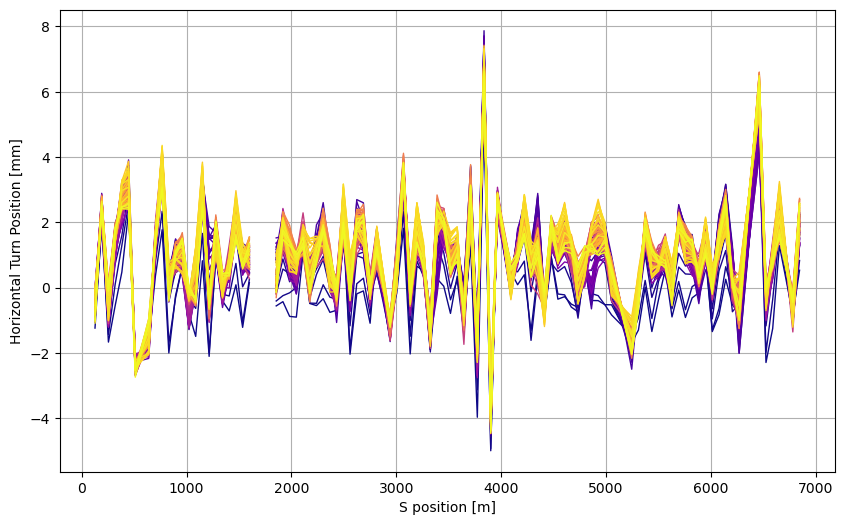

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
#s_positions_bpms = np.array([line.get_s_position(f'{bpm}..0') for bpm in bpm_dict[selected_ts[0]].bpms_hor])
cmap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=0, vmax=len(data.hor_turn_position)-1)
for i in range(len(data.hor_turn_position)):
    ax.plot(s_positions_bpms[mask_bpm], data.hor_turn_position[mask_bpm][:, i], color=cmap(norm(i)), lw=1)
ax.grid()
ax.set_xlabel('S position [m]')
ax.set_ylabel('Horizontal Turn Position [mm]')

In [42]:
data['data']['BPMALPS_1']['Positions'][0]

<Array [[2.98, 2.95, 2.96, ..., nan, nan, nan], ...] type='40 * var * float64'>

In [44]:
mask = [name.endswith('H') for name in data['data']['BPMALPS_1']['ChannelNames'][0]]

 ...]

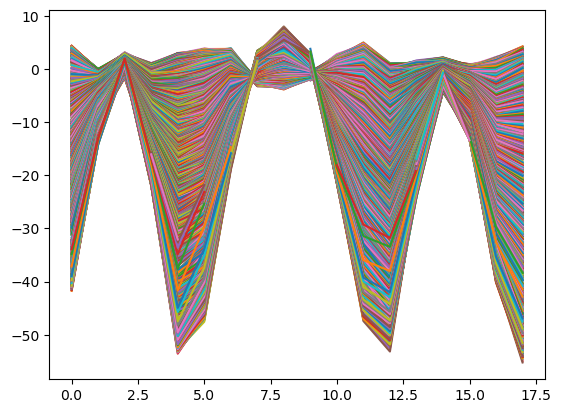

In [46]:
plt.plot(data['data']['BPMALPS_1']['Positions'][0][mask])

In [55]:
data['data']['BPMALPS_1']['Positions'][0][mask]

<Array [[0.0971, 0.788, 1.52, ..., nan, nan], ...] type='18 * var * float64'>

In [52]:
data.hor_turn_position[:18]

<Array [[0.0971, 0.788, 1.52, ..., nan, nan], ...] type='18 * var * float64'>

 ...]

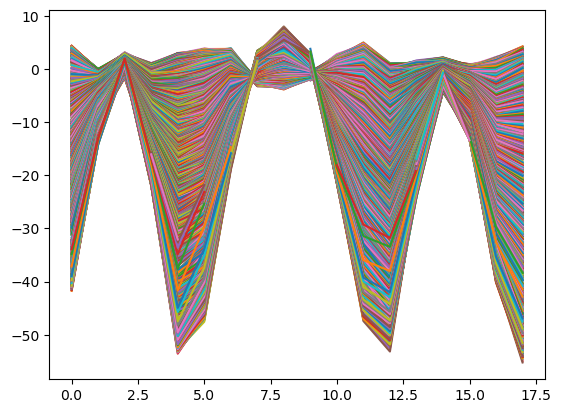

In [63]:
plt.plot(data.hor_turn_position[:18])

 ...]

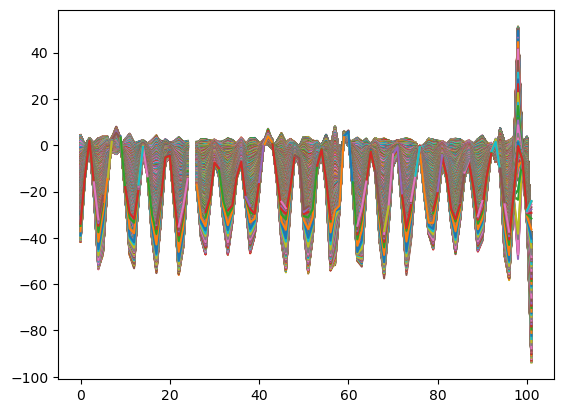

In [65]:
plt.plot(data.hor_turn_position[:, :np.min([len(bpm) for bpm in data.hor_turn_position])])

In [64]:
for bpm in data.hor_turn_position:
    print(len(bpm))

5488
5488
5488
5488
5488
5488
5488
5488
5488
5488
5488
5488
5488
5488
5488
5488
5488
5488
5376
5376
5376
5376
5376
5376
5376
5376
5376
5376
5376
5376
5376
5376
5376
5376
5484
5484
5484
5484
5484
5484
5484
5484
5484
5484
5484
5484
5484
5484
5484
5484
5484
5484
5514
5514
5514
5514
5514
5514
5514
5514
5514
5514
5514
5514
5514
5514
5514
5514
5514
5536
5536
5536
5536
5536
5536
5536
5536
5536
5536
5536
5536
5536
5536
5536
5536
5532
5532
5532
5532
5532
5532
5532
5532
5532
5532
5532
5532
5532
5532
5532
5532
5532


## Test plot

In [ ]:
def get_bpm_in_line(bpm_name):
    return bpm_name if bpm_name != 'bph.41608' else 'bph.41607'

mask_bpm = np.array([True if bpm not in ['bph.10208', 'bph.31808', 'bph.63008', 'bph.63608', 'bph.62008', 'bph.11831'] else False for bpm in data.bpms_hor])
s_positions_bpms = []
for bpm in data.bpms_hor:
    s_positions_bpms.append(line.get_s_position(f'{get_bpm_in_line(bpm)}'))

s_positions_bpms = np.array(s_positions_bpms)

min_acq_number = np.min([len(bpm) for bpm in data.hor_turn_position])

Text(0, 0.5, 'Horizontal Turn Position [mm]')

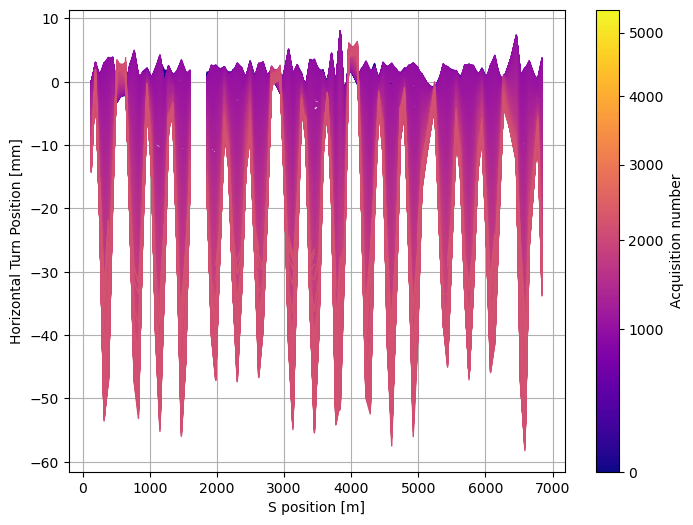

In [83]:
fig, ax = plt.subplots(figsize=(8, 6))
cmap = plt.get_cmap('plasma')
# norm = colors.Normalize(vmin=0, vmax=min_acq_number-1)
norm = colors.PowerNorm(gamma=0.7, vmin=0, vmax=min_acq_number - 1)
for i in range(min_acq_number):
    ax.plot(
        s_positions_bpms[mask_bpm],
        data.hor_turn_position[mask_bpm][:, i],
        color=cmap(norm(i)),
        lw=1
    )

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Acquisition number")
ax.grid()
ax.set_xlabel('S position [m]')
ax.set_ylabel('Horizontal Turn Position [mm]')

# Test matching orbit

In [13]:
def build_response_matrix(tw, monitor_names, corrector_names, plane=None):

    assert plane in ['x', 'y']

    # Build response matrix
    indices_monitors = tw.rows.indices[monitor_names]
    indices_correctors = tw.rows.indices[corrector_names]
    bet_monitors = tw['bet' + plane][indices_monitors]
    bet_correctors = tw['bet' + plane][indices_correctors]

    mu_monitor = tw['mu' + plane][indices_monitors]
    mux_correctors = tw['mu' + plane][indices_correctors]

    n_monitors = len(monitor_names)
    n_correctors = len(corrector_names)

    bet_prod = np.atleast_2d(bet_monitors).T @ np.atleast_2d(bet_correctors)
    mu_diff = (np.tile(mu_monitor, (n_correctors, 1)).T
                        - np.tile(mux_correctors, (n_monitors, 1)))

    # Slide 28
    # https://indico.cern.ch/event/1328128/contributions/5589794/attachments/2786478/4858384/linearimperfections_2024.pdf
    tune = tw['q' + plane]
    response_matrix = (np.sqrt(bet_prod) / 2 / np.sin(np.pi * tune)
                            * np.cos(np.pi * tune - 2*np.pi*np.abs(mu_diff)))

    return response_matrix

# """
#     Construct response matrix
#     """
#     response_matrix_H = build_response_matrix(
#         tw=tw_ref, 
#         monitor_names=target_at_H, 
#         corrector_names=errors_H, 
#         plane='x')
#     response_matrix_V = build_response_matrix(
#         tw=tw_ref, 
#         monitor_names=target_at_V, 
#         corrector_names=errors_V, 
#         plane='y')
    

#     """
#     Calculate necessary errors
#     """
#     U_H, sigma_H, VT_H = np.linalg.svd(response_matrix_H, full_matrices=False)
#     threshold_H = 1e-3 * np.max(sigma_H)
#     sigma_inv_H = np.array([1/s if s > threshold_H else 0 for s in sigma_H])
#     M_pseudo_inv_H = VT_H.T @ np.diag(sigma_inv_H) @ U_H.T
#     k_H = M_pseudo_inv_H @ target_val_H

#     U_V, sigma_V, VT_V = np.linalg.svd(response_matrix_V, full_matrices=False)
#     threshold_V = 1e-4 * np.max(sigma_V)
#     sigma_inv_V = np.array([1/s if s > threshold_V else 0 for s in sigma_V])
#     M_pseudo_inv_V = VT_V.T @ np.diag(sigma_inv_V) @ U_V.T
#     k_V = M_pseudo_inv_V @ target_val_V


In [14]:
error_locs_H = []
for i in range(len(line.element_names)):
    name = line.element_names[i]
    if name.startswith("qf."):
        error_locs_H.append(name)

In [15]:
line.discard_tracker()

for i in range(len(error_locs_H)):
    print("Adding H error", i+1, "out of", len(error_locs_H))

    error_loc_name = re.split(r"[._]", error_locs_H[i])
    knl_name = "knl_err_" + error_loc_name[0] + error_loc_name[1]
    errname = "errH_" + error_loc_name[0] + error_loc_name[1]

    line.vars[knl_name] = 0.0

    curr_multipole_error = xt.Multipole(knl=[0.0], ksl=[0.0])
    curr_idx = np.where(np.asarray(line.element_names) == error_locs_H[i])[0][0] + 1
    line.insert_element(element=curr_multipole_error, name=errname, at=curr_idx)

    line.element_refs[errname].knl[0] = line.vars[knl_name]

Adding H error 1 out of 102
Adding H error 2 out of 102
Adding H error 3 out of 102
Adding H error 4 out of 102
Adding H error 5 out of 102
Adding H error 6 out of 102
Adding H error 7 out of 102
Adding H error 8 out of 102
Adding H error 9 out of 102
Adding H error 10 out of 102
Adding H error 11 out of 102
Adding H error 12 out of 102
Adding H error 13 out of 102
Adding H error 14 out of 102
Adding H error 15 out of 102
Adding H error 16 out of 102
Adding H error 17 out of 102
Adding H error 18 out of 102
Adding H error 19 out of 102
Adding H error 20 out of 102
Adding H error 21 out of 102
Adding H error 22 out of 102
Adding H error 23 out of 102
Adding H error 24 out of 102
Adding H error 25 out of 102
Adding H error 26 out of 102
Adding H error 27 out of 102
Adding H error 28 out of 102
Adding H error 29 out of 102
Adding H error 30 out of 102
Adding H error 31 out of 102
Adding H error 32 out of 102
Adding H error 33 out of 102
Adding H error 34 out of 102
Adding H error 35 out o

In [16]:
line.build_tracker()

In [17]:
errors_H = []
for name in line.element_names:
    if "errH" in name:
        errors_H.append(name)

In [18]:
tw_ref = line.twiss()

In [21]:
response_matrix_H = build_response_matrix(
        tw=tw_ref, 
        monitor_names=[f'{get_bpm_in_line(name)}' for name in data.bpms_hor[mask_bpm]], 
        corrector_names=errors_H, 
        plane='x')

In [23]:
U_H, sigma_H, VT_H = np.linalg.svd(response_matrix_H, full_matrices=False)
threshold_H = 1e-3 * np.max(sigma_H)
sigma_inv_H = np.array([1/s if s > threshold_H else 0 for s in sigma_H])
M_pseudo_inv_H = VT_H.T @ np.diag(sigma_inv_H) @ U_H.T
k_H = M_pseudo_inv_H @ ak.to_numpy(m[mask_bpm]*1e-3)

In [24]:
vary_H = []
for var_name in line.vars.keys():
    if "knl_err" in var_name:
        vary_H.append(var_name)

In [25]:
for i in range(len(vary_H)):
    line.vv[vary_H[i]] = k_H[i] * -1

AttributeError: 'numpy.float64' object has no attribute '_update_from'

In [28]:
k_H[i] * -1

AttributeError: 'numpy.float64' object has no attribute '_update_from'

In [30]:
k_H

ValueError: could not broadcast where mask from shape (102,96) into shape (102,)